# Loading libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from haversine import haversine
import seaborn as sns

In [2]:
#pip install haversine

# Loading Dataset & Performing EDA

In [3]:
data_new=pd.read_csv("C:/Users/AYRUS/Desktop/nyc_taxi_trip_duration.csv")

In [4]:
data_new.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
data_new.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
data_new.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
data_new.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
data_new.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [9]:
data_new.passenger_count.value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [10]:
data=data_new[data_new['passenger_count']!=0]
data=data_new[data_new['passenger_count']<=6]

In [11]:
data.passenger_count.value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
Name: passenger_count, dtype: int64

In [12]:
data['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
102646          1
672240          1
398887          1
95823           1
312992          1
Name: trip_duration, Length: 729320, dtype: int64

In [13]:
data.drop(data[data['trip_duration']==1939736].index,inplace=True)

In [14]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729319.000000,729319.000000,729319.000000,729319.000000,729319.000000,729319.000000,729319.000000
mean,1.535402,1.662038,-73.973513,40.750919,-73.973422,40.751776,949.572603
std,0.498745,1.312405,0.069753,0.033594,0.069587,0.036037,3127.526086
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,397.000000
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,663.000000
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1075.000000
max,2.000000,6.000000,-65.897385,51.881084,-65.897385,43.921028,86391.000000


In [15]:
data.shape

(729319, 11)

In [16]:
# Converting vendor_id and store_and_fwd_flag as category
data['vendor_id']=data['vendor_id'].astype('category')
data['store_and_fwd_flag']=data['store_and_fwd_flag'].astype('category')

In [17]:
# Converting pickup_datetime and dropoff_datetime in datetime format
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')

In [18]:
data.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

In [19]:
# Creating new column and storing hour value
data['pickup_hour']=data['pickup_datetime'].dt.hour

In [20]:
# Creating new column and storing pickup time of day value
data['pick_time_of_the_day']=data.pickup_hour.apply(lambda y:(y%24+4)//4).replace({1:'Late Night',
                                                                                   2:'Early Morning',
                                                                                   3:'Morning',
                                                                                   4:'Afternoon',
                                                                                   5:'Evening',
                                                                                   6:'Night'})

In [21]:
# Creating new day_of_the_week column which stores the day of week
data['day_of_the_week']=data.pickup_datetime.apply(lambda x:x.day_name())

In [22]:
# Converting  trip duration in hours to second
data['trip_duration_in_hours']=data.trip_duration.apply(lambda x: x/3600)

In [23]:
#Transforming day of week - Monday (0) to Sunday (6)
data['pickup_day_of_week']=data['pickup_datetime'].dt.dayofweek

In [24]:
#Transforming pick up time of the day
condition=[data['pick_time_of_the_day']=='Late Night',
           data['pick_time_of_the_day']=='Early Morning',
           data['pick_time_of_the_day']=='Morning',
           data['pick_time_of_the_day']=='Afternoon',
           data['pick_time_of_the_day']=='Evening',
           data['pick_time_of_the_day']=='Night']

choice=[0,1,2,3,4,5]

data['pick_time_of_the_day_in_numbers']=np.select(condition,choice)

In [25]:
# define a function to calculate distance 
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)



In [26]:
# creating a new column to store the distance value
data['total_distance'] = data.apply(lambda x: calc_distance(x), axis = 1)

In [27]:
# calculating speed 
data['speed'] = (data.total_distance/(data.trip_duration/3600))

In [28]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pick_time_of_the_day,day_of_the_week,trip_duration_in_hours,pickup_day_of_week,pick_time_of_the_day_in_numbers,total_distance,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,16,Evening,Monday,0.111111,0,4,1.199074,10.791668
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,23,Night,Friday,0.305556,4,5,4.129117,13.513473
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,17,Evening,Sunday,0.454167,6,4,7.250763,15.964983
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,9,Morning,Tuesday,0.316944,1,2,2.361101,7.449573
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,6,Early Morning,Wednesday,0.235556,2,1,4.328540,18.375877


In [29]:
# Creating a dataframe to use for regression
data_features=['vendor_id','passenger_count','pickup_day_of_week','pick_time_of_the_day_in_numbers','trip_duration_in_hours','total_distance','speed']

In [30]:
nyc_data=data[data_features]
nyc_data.head()

,vendor_id,passenger_count,pickup_day_of_week,pick_time_of_the_day_in_numbers,trip_duration_in_hours,total_distance,speed
0,2,1,0,4,0.111111,1.199074,10.791668
1,1,2,4,5,0.305556,4.129117,13.513473
2,2,2,6,4,0.454167,7.250763,15.964983
3,2,6,1,2,0.316944,2.361101,7.449573
4,1,1,2,1,0.235556,4.328540,18.375877


 # Segragating variables Independent and Dependent

In [31]:
# seprating independent and dependent variables
x=nyc_data.drop(['trip_duration_in_hours'],axis=1)
y=data['trip_duration_in_hours']

x.shape , y.shape

((729319, 6), (729319,))

# Importing train test split

In [32]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56)

# Importing Linear Regression & Mean Absolute Error

In [33]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [34]:
# Creating instance of Linear Regresssion
lr=LR()
lr.fit(train_x,train_y)

LinearRegression()

In [35]:
#  Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k1 = mae(train_predict, train_y)
print('Training Mean Absolute Error', k1)

Training Mean Absolute Error 0.09736722896266335


In [36]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k2 = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k2 )

Test Mean Absolute Error     0.09902506089335923


<function matplotlib.pyplot.show(close=None, block=None)>

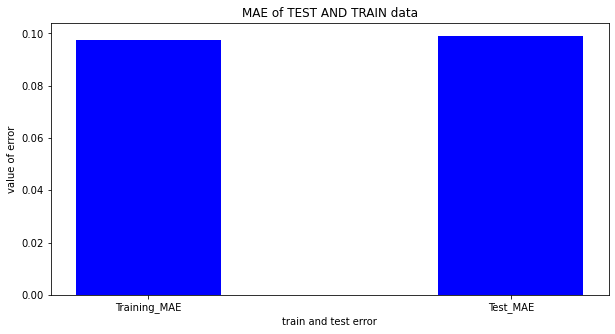

In [37]:
# creating data for bar plot
create_data={'Training_MAE':k1,
            'Test_MAE':k2}

display=list(create_data.keys())
value=list(create_data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(display, value, color ='blue',
        width = 0.4)

plt.xlabel("train and test error")
plt.ylabel("value of error")
plt.title("MAE of TEST AND TRAIN data")
plt.show

In [38]:
lr.coef_

array([ 0.05510897,  0.00350898,  0.00146914, -0.00071647,  0.05121949,
       -0.01225439])

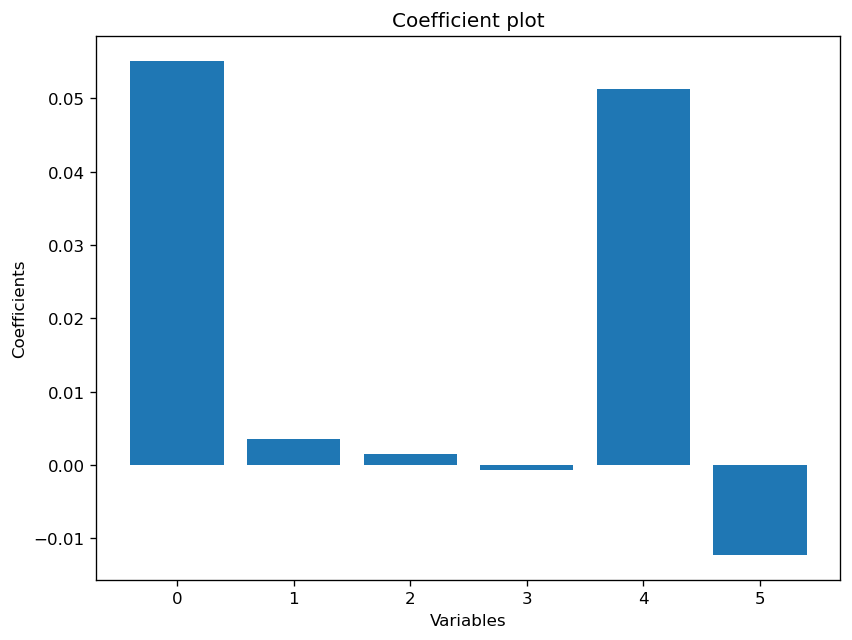

In [39]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot');

In [40]:
# calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
14908,0.668333,0.872062,-0.203728
223798,0.025278,0.177354,-0.152076
582522,0.049167,0.034962,0.014204
382010,0.133333,0.243796,-0.110463
619443,0.209722,0.222530,-0.012807


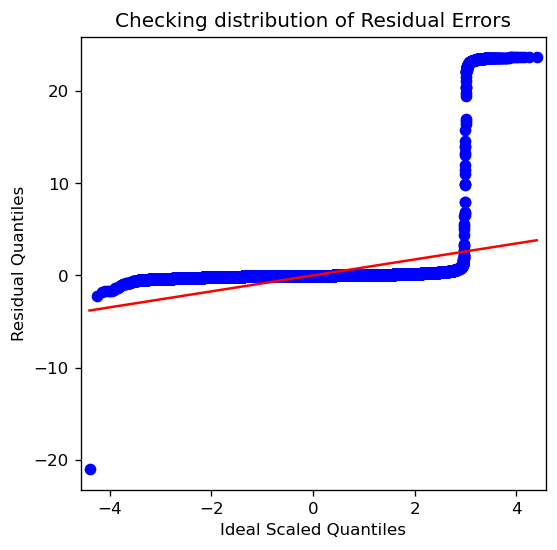

In [41]:
# Importing qqplot 
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

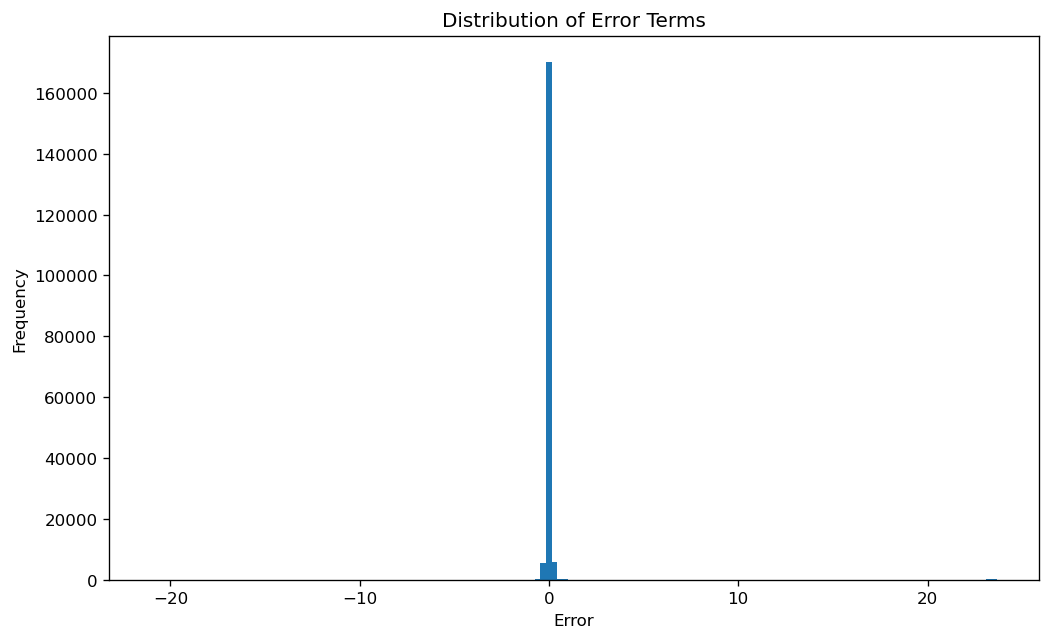

In [42]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

# Importing ridge 

In [43]:
from sklearn.linear_model import Ridge
m = Ridge(alpha=0.01)
m.fit(train_x,train_y)
Ridge_train_score=m.score(train_x,train_y)


In [44]:
# getting train score
Ridge_train_score

0.04641383298644963